# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 About the Completition</p>

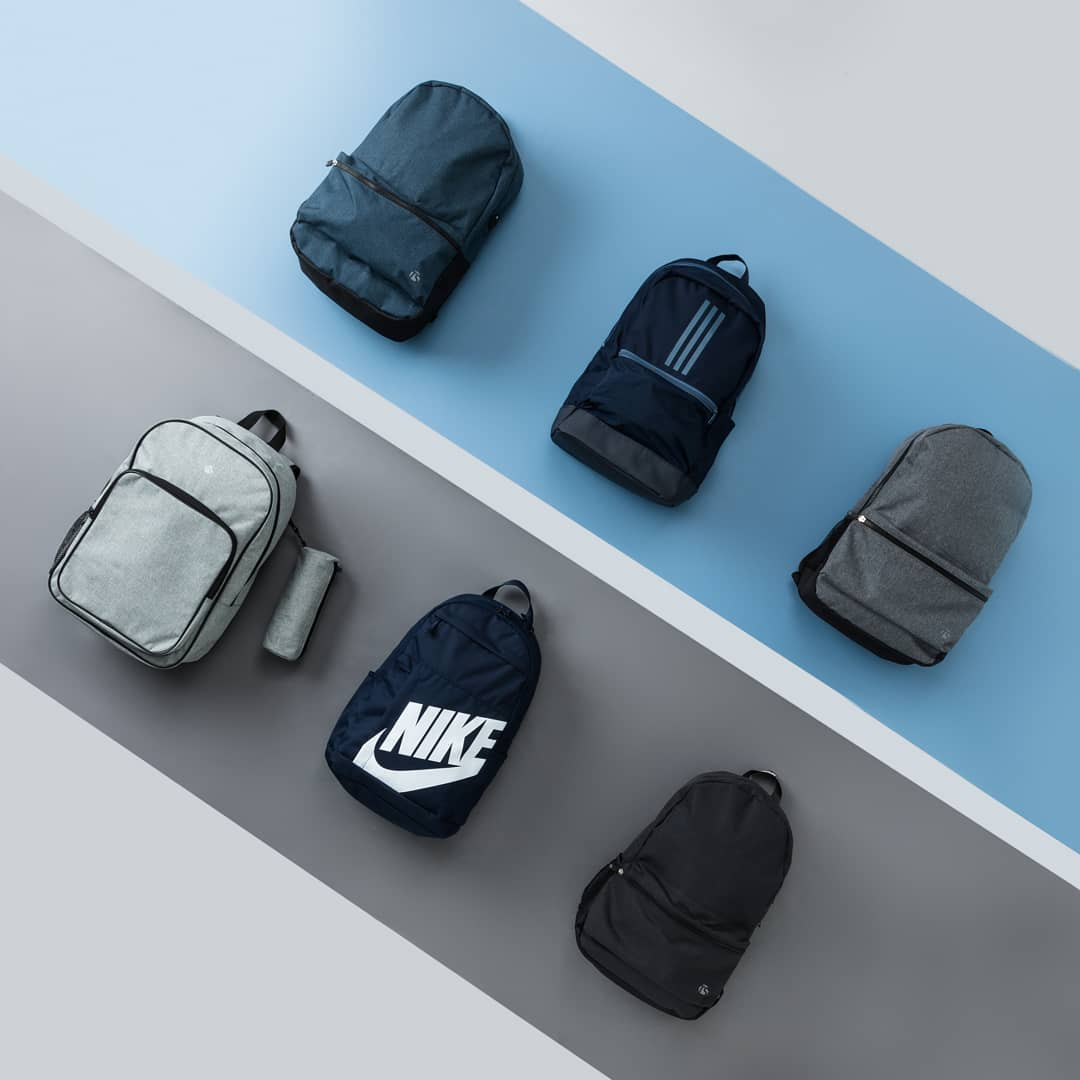

## 📌 Overview
Welcome to the **2025 Kaggle Playground Series**! This competition provides an **approachable dataset** for the community to practice **machine learning skills**, with a new challenge each month.

Your task: **Predict the price of backpacks** based on various attributes.

## 📊 Evaluation Metric
Submissions are evaluated using **Root Mean Squared Error (RMSE)**:

$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2}$

where:
- $y_i$ = actual price
- $\hat{y}_i$ = predicted price

A **lower RMSE** indicates better performance.

## 📅 Timeline
- **Start Date:** February 1, 2025  
- **Final Submission Deadline:** February 28, 2025 (11:59 PM UTC)  
- **Team Merger Deadline:** February 28, 2025  

The competition timeline may be updated at the organizers' discretion.

## 📦 About the Tabular Playground Series
This series offers **lightweight, synthetic datasets** for hands-on practice in **data science and machine learning**. It allows quick iteration on:
- **Exploratory Data Analysis (EDA)**
- **Feature Engineering**
- **Model Development & Optimization**

The datasets are **synthetically generated** from real-world data, ensuring **realistic feature distributions** while preventing public test labels.

## 🎯 Notebook Goal
This notebook will cover:

✅ **Exploratory Data Analysis (EDA)** to uncover insights  
✅ **Feature Engineering** to enhance model performance  
✅ **Baseline Model** using an **ensemble approach** for robust predictions  

## 🔗 Useful Links (TBU)
- [Competition Page](https://www.kaggle.com/competitions/playground-series-s5e2)
- [Discussion Forum](https://www.kaggle.com/competitions/playground-series-s5e2/discussion?sort=published)
- [Kaggle Notebooks](https://www.kaggle.com/competitions/playground-series-s5e2/code)

---



# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 About the Dataset</p>

## 📊 Brief overview of the columns:

| Column                  | Description |
|-------------------------|-------------|
| **id**                  | Unique identifier for each backpack |
| **Brand**               | Brand name of the backpack |
| **Material**            | Primary material used (e.g., nylon, leather, canvas) |
| **Size**                | General size category (e.g., small, medium, large) |
| **Compartments**        | Number of compartments in the backpack |
| **Laptop Compartment**  | Indicates whether there is a dedicated laptop compartment (Yes/No) |
| **Waterproof**          | Whether the backpack is waterproof (Yes/No) |
| **Style**               | Type of backpack (e.g., tole, messenger, backpack) |
| **Color**               | Color of the backpack |
| **Weight Capacity (kg)** | Maximum weight the backpack can carry |
| **Price**               | Target variable – the price of the backpack (to be predicted) |

## 📂 Dataset Files
- **`train.csv`** 📄 – Training dataset containing backpack features along with their corresponding prices (our target variable).
- **`test.csv`** 📄 – Test dataset where we need to predict the price based on given features.
- **`sample_submission.csv`** 📄 – A sample submission file in the correct format.
- **`training_extra.csv`** 📄 – Additional data available for training.

## 🧐 Key Considerations
- **Categorical Features:** Brand, Material, Size, Style, Color, Laptop Compartment, and Waterproof.
- **Numerical Features:** Compartments, Weight Capacity (kg), and Price.
- **Target Variable:** `Price`, which we aim to predict.

This dataset allows for a variety of **feature engineering** opportunities, such as encoding categorical variables, handling missing values, and exploring relationships between features.

---


# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 Import</p>

In [1]:
# Misc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
import os
import gc
import warnings
import time
from typing import List
from math import sqrt
import polars as pl

# Sklearn classes for model selection, cross validation, and performance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


# Hypertuning
import optuna

# Gradient boosting
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from catboost import CatBoost, CatBoostRegressor
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from copy import deepcopy
from sklearn.metrics import mean_squared_error

# Seaborn
rc = {
    #FAEEE9
    "axes.facecolor": "#243139",
    "figure.facecolor": "#243139",
    "axes.edgecolor": "#000000",
    "grid.color": "#000000",
    "font.family": "arial",
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#FFFFFF",
    "ytick.color": "#FFFFFF",
    "grid.alpha": 0.4,
}
sns.set(rc=rc)
#sns.set_palette("YlOrRd")

# Useful line of code to set the display option so we could see all the columns in pd dataframe
pd.set_option('display.max_columns', None)

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Functions
def print_sl():
    print("=" * 50)
    print()

# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 Dataset Overview</p>

In [2]:
# Load Data
train_PATH    = '/kaggle/input/playground-series-s5e2/train.csv'
train_ex_PATH = '/kaggle/input/playground-series-s5e2/training_extra.csv'
test_PATH     = '/kaggle/input/playground-series-s5e2/test.csv'
sub_PATH      = '/kaggle/input/playground-series-s5e2/sample_submission.csv'

train_df      = pd.read_csv(train_PATH)
train_ex_df   = pd.read_csv(train_ex_PATH)
test_df       = pd.read_csv(test_PATH)
sub_df        = pd.read_csv(sub_PATH)

train_df.drop('id',axis=1,inplace=True)
train_ex_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

print('Data Loaded Succesfully!')
print_sl()

# Fast Data Check
print(f'Train Data Shape: {train_df.shape}')
print(f'Are there any null values in train? - {train_df.isnull().any().any()}\n')

print(f'Train Data Shape: {train_ex_df.shape}')
print(f'Are there any null values in train? - {train_ex_df.isnull().any().any()}\n')

print(f'Test Data Shape:  {test_df.shape}')
print(f'Are there any null values in test? - {test_df.isnull().any().any()}\n')
print_sl()

# Traget
target = 'Price'

train_df.head()

Data Loaded Succesfully!

Train Data Shape: (300000, 10)
Are there any null values in train? - True

Train Data Shape: (3694318, 10)
Are there any null values in train? - True

Test Data Shape:  (200000, 9)
Are there any null values in test? - True




,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 EDA</p>

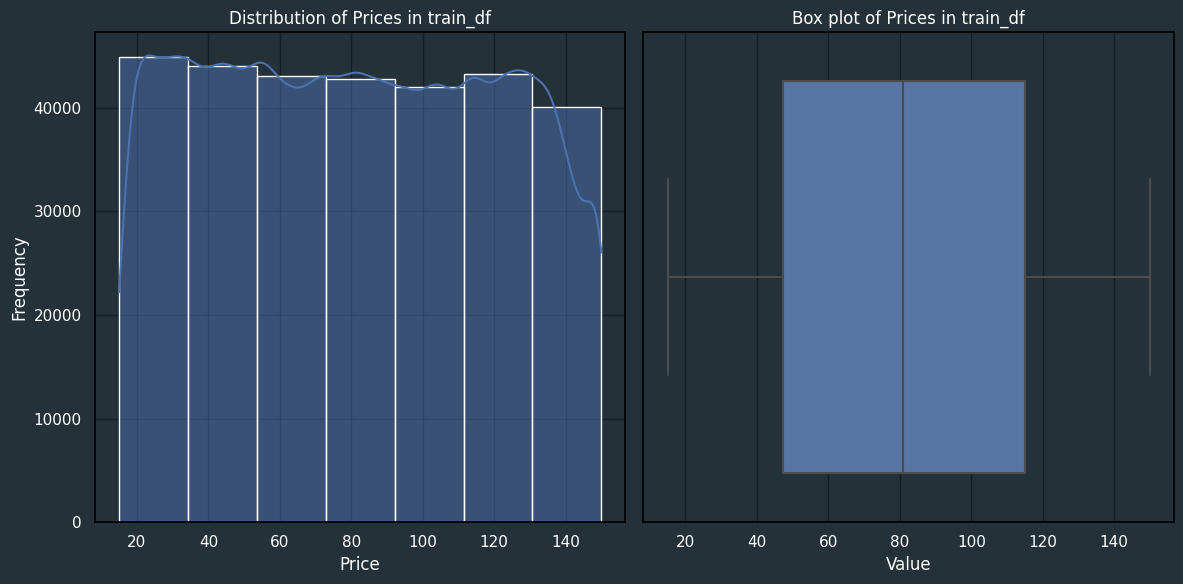

In [3]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_df[target], bins=7, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Prices in train_df', color='white')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_df[target], ax=axes[1])
axes[1].set_title('Box plot of Prices in train_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

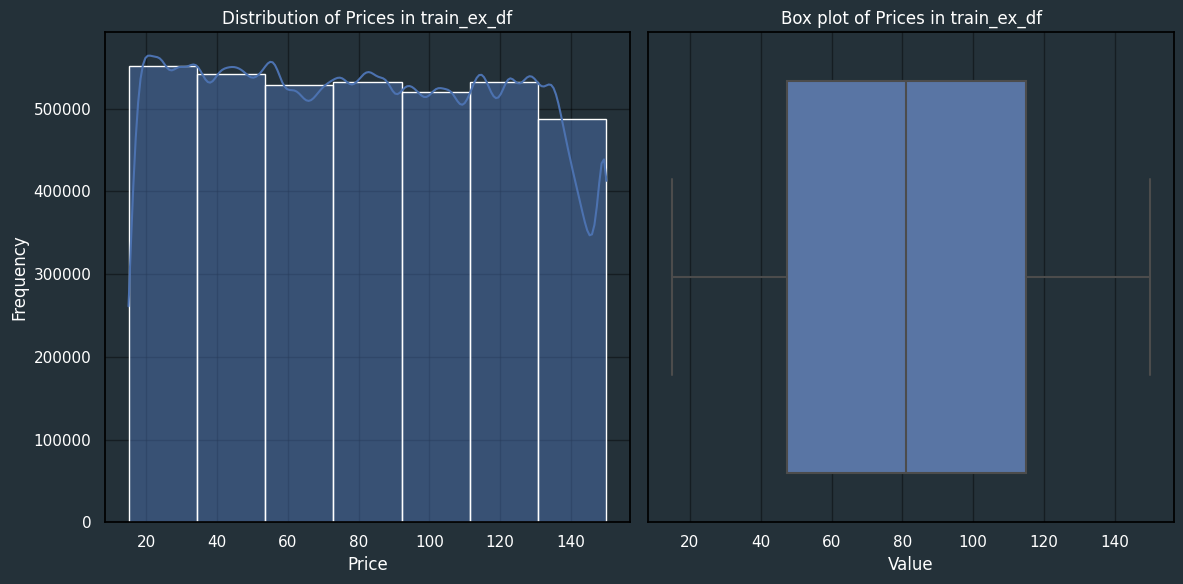

In [4]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_ex_df[target], bins=7, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Prices in train_ex_df', color='white')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_ex_df[target], ax=axes[1])
axes[1].set_title('Box plot of Prices in train_ex_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [5]:
train_ex_df['Compartments'].unique()

array([10.,  4.,  8.,  7.,  9.,  5.,  6.,  2.,  3.,  1.])

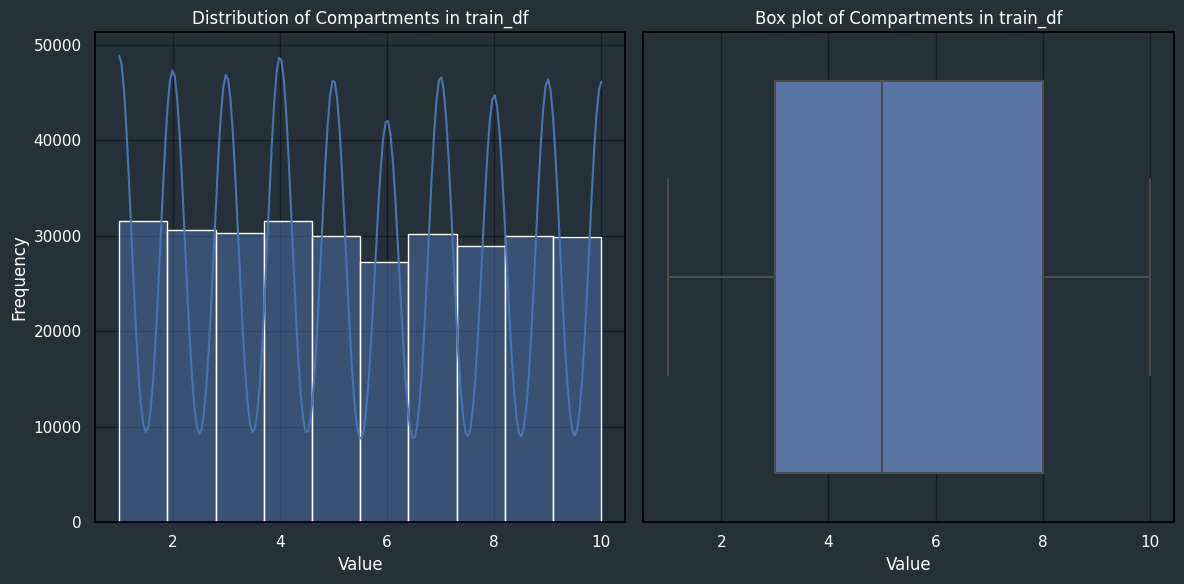

In [6]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_df['Compartments'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Compartments in train_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_df['Compartments'], ax=axes[1])
axes[1].set_title('Box plot of Compartments in train_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

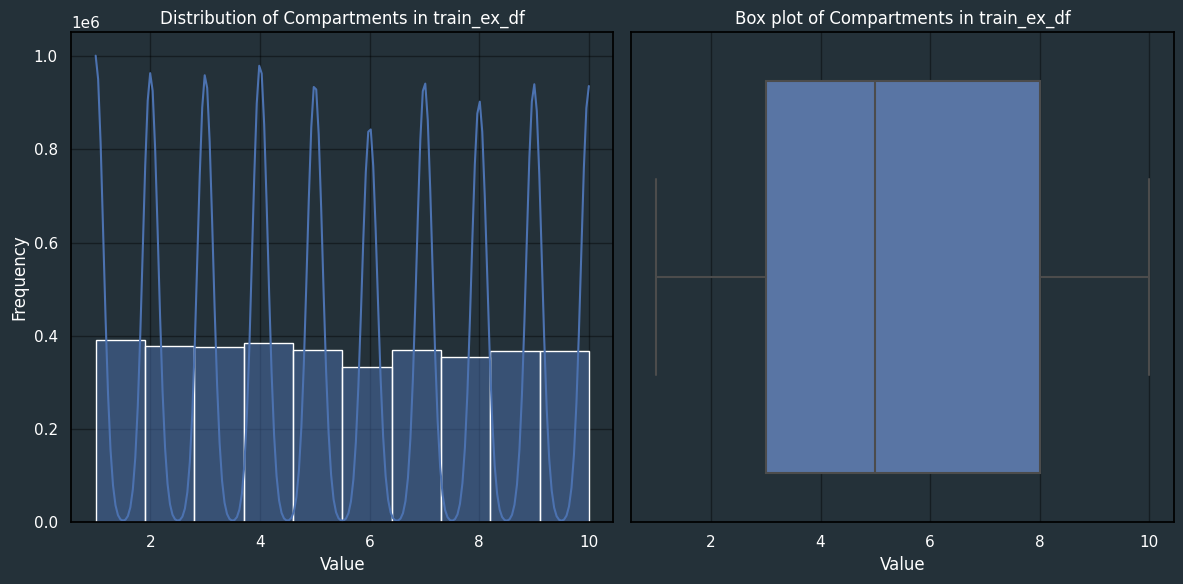

In [7]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_ex_df['Compartments'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Compartments in train_ex_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_ex_df['Compartments'], ax=axes[1])
axes[1].set_title('Box plot of Compartments in train_ex_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

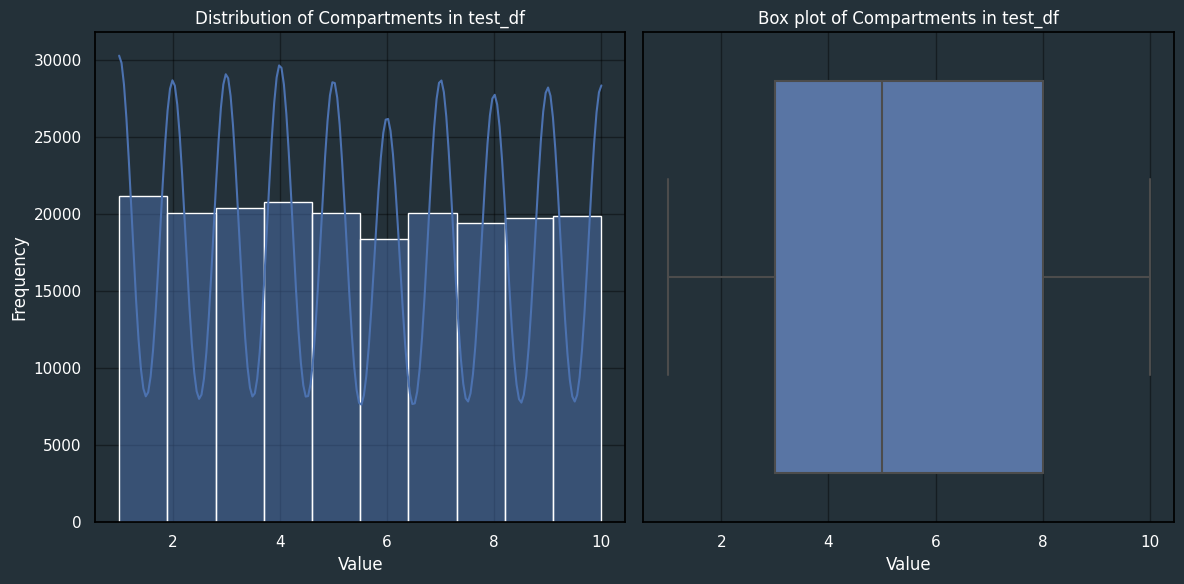

In [8]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(test_df['Compartments'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Compartments in test_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=test_df['Compartments'], ax=axes[1])
axes[1].set_title('Box plot of Compartments in test_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

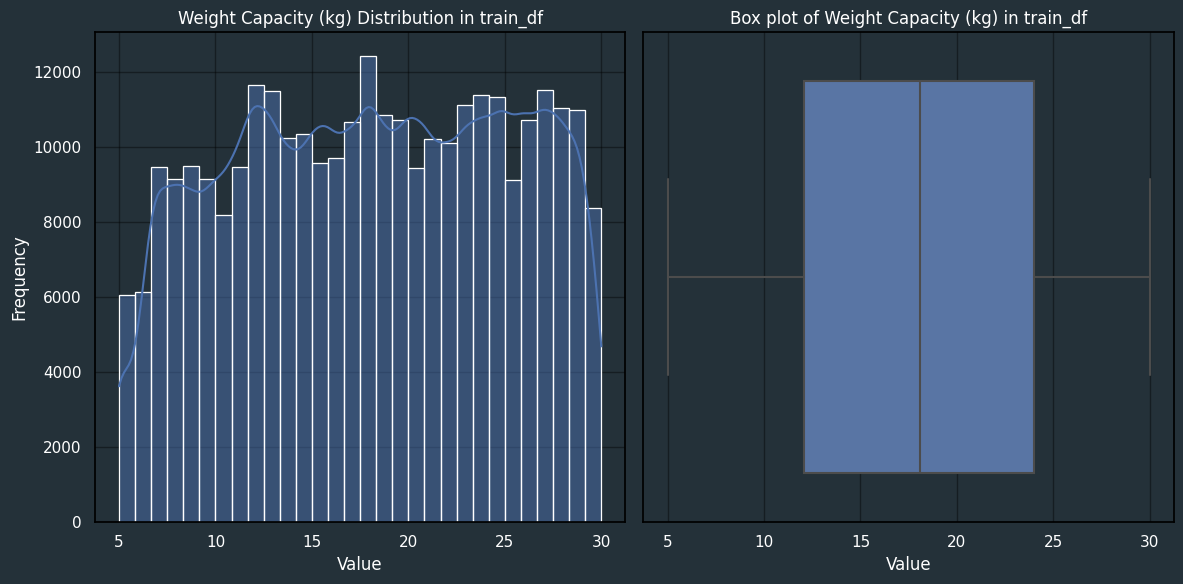

In [9]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_df['Weight Capacity (kg)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Weight Capacity (kg) Distribution in train_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_df['Weight Capacity (kg)'], ax=axes[1])
axes[1].set_title('Box plot of Weight Capacity (kg) in train_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

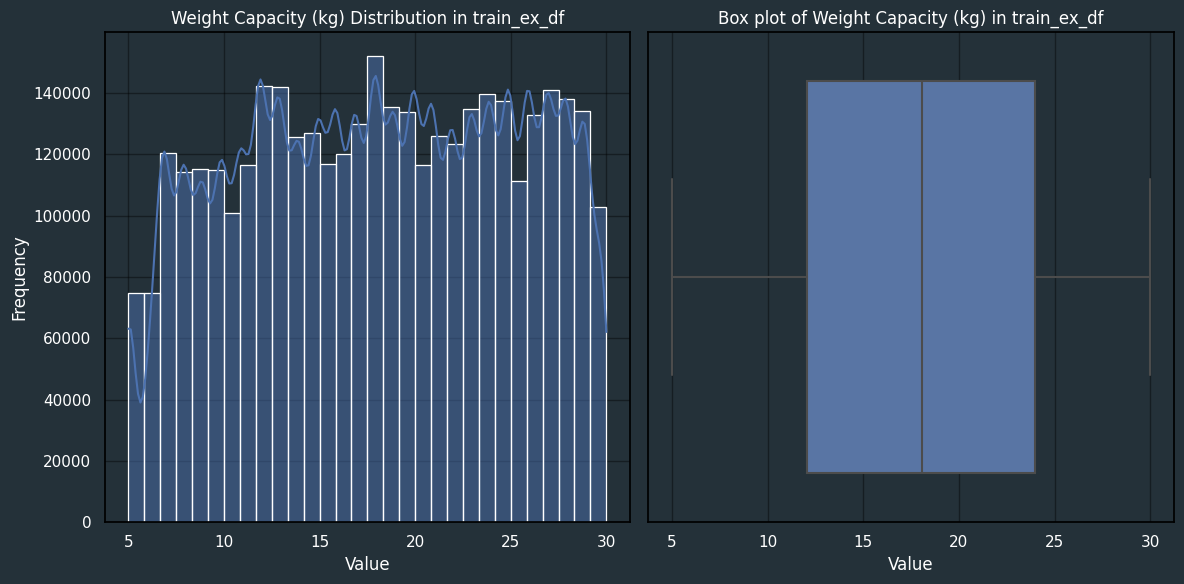

In [10]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(train_ex_df['Weight Capacity (kg)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Weight Capacity (kg) Distribution in train_ex_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=train_ex_df['Weight Capacity (kg)'], ax=axes[1])
axes[1].set_title('Box plot of Weight Capacity (kg) in train_ex_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

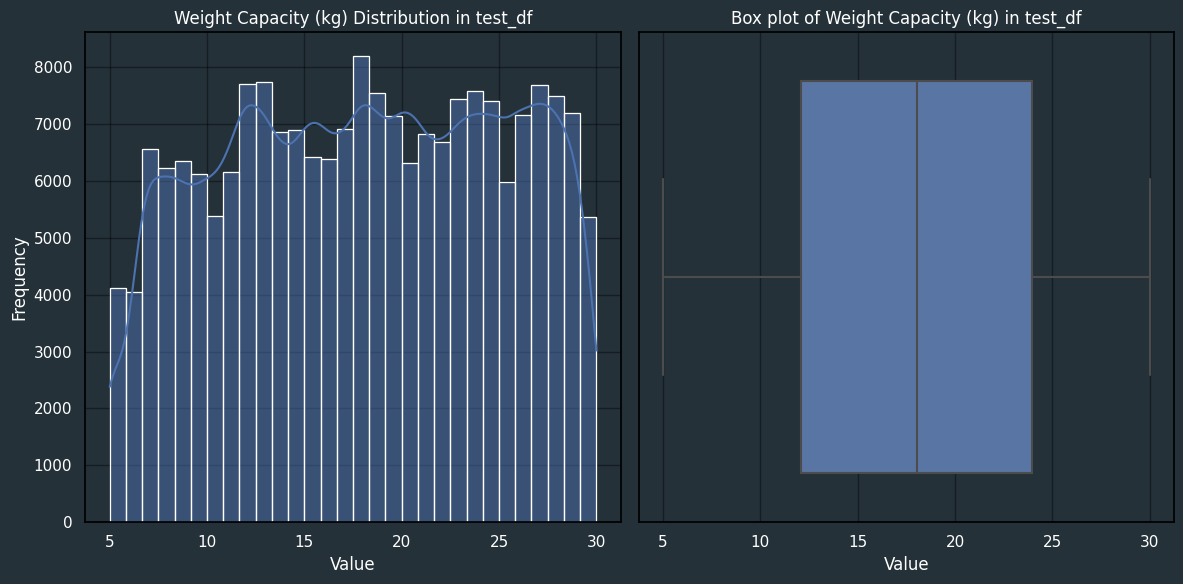

In [11]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(test_df['Weight Capacity (kg)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Weight Capacity (kg) Distribution in test_df', color='white')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=test_df['Weight Capacity (kg)'], ax=axes[1])
axes[1].set_title('Box plot of Weight Capacity (kg) in test_df', color='white')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

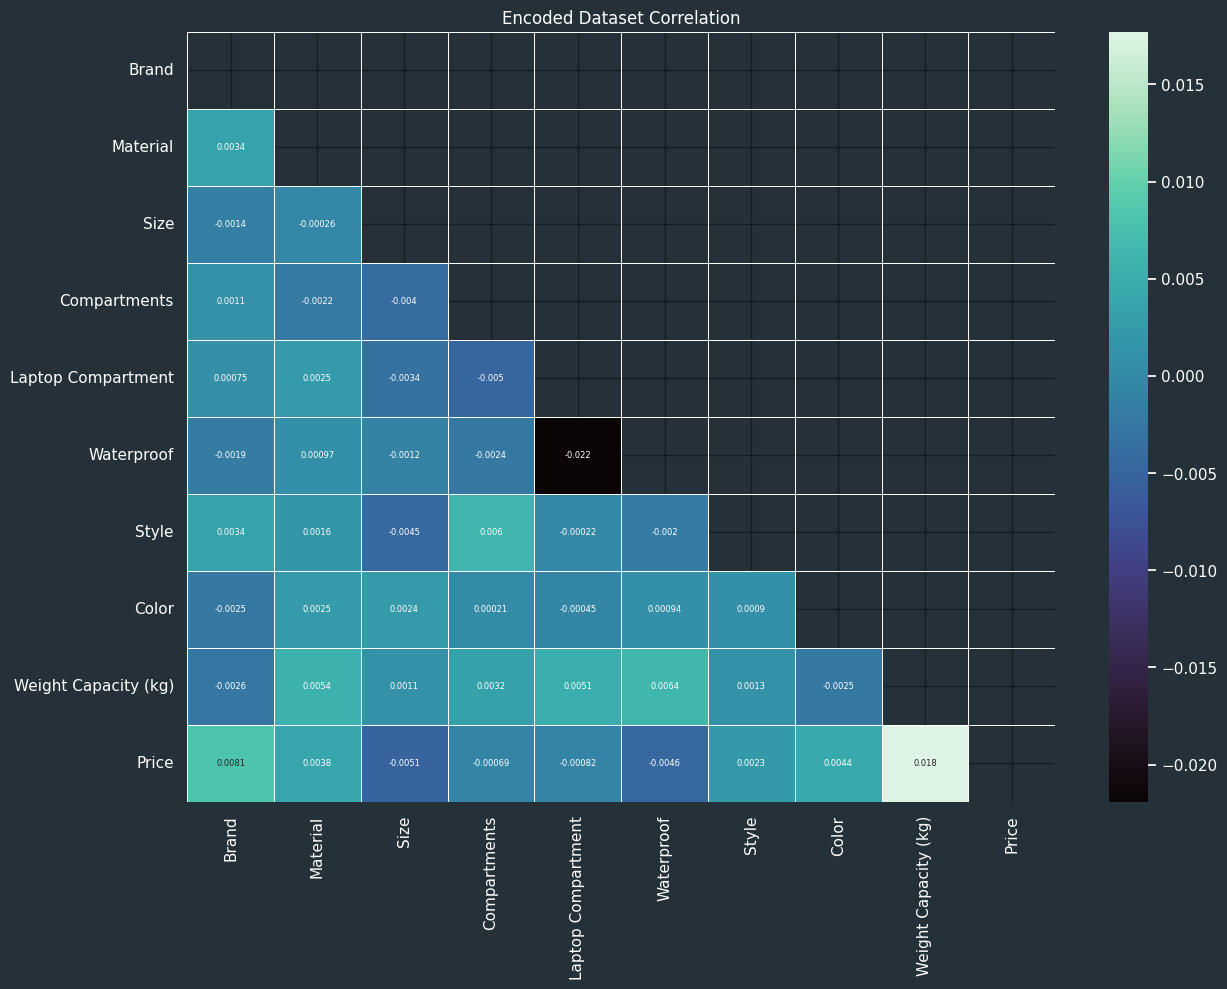

In [12]:
# Create a copy of the dataframe
df_encoded = pd.concat([train_ex_df, train_df], axis=0).reset_index(drop=True).copy()

# Assuming these are your categorical variables, including 'outcome'
categorical_vars = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment','Waterproof', 'Style', 'Color']

# Label encode categorical columns
label_encoders = {}
for column in categorical_vars:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str = 'Train correlation') -> None:
    excluded_columns = ['id']
    columns_without_excluded = [col for col in df.columns if col not in excluded_columns]
    corr = df[columns_without_excluded].corr()
    
    fig, axes = plt.subplots(figsize=(14, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='mako', annot=True, annot_kws={"size": 6})
    plt.title(title_name, color='white')
    plt.show()

# Plot correlation heatmap for encoded dataframe
plot_correlation_heatmap(df_encoded, 'Encoded Dataset Correlation')

In [13]:
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    f, ax = plt.subplots(1, 2, figsize=(16, 7))
    plt.subplots_adjust(wspace=0.2)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    colors = sns.color_palette("mako")
    # hex_colors = [matplotlib.colors.to_hex(color) for color in colors]
    # print(hex_colors)
    
    outer_colors = ['#2e1e3b', '#413d7b', '#37659e', '#348fa7', '#40b7ad', '#8bdab2']
    inner_colors = ['#2e1e3b', '#413d7b', '#37659e', '#348fa7', '#40b7ad', '#8bdab2']
    #inner_colors = ['#59b3a3',] #'#433C64']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
        textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
    )

    textprops = {
        'size': 13, 
        'weight': 'bold', 
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='#243139', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette=colors, orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,       
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='white', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='white')
    ax[1].set_ylabel('count', fontweight="bold", color='white')

    f.suptitle(f'{title_name}', fontsize=14, fontweight='bold', color='white')
    plt.tight_layout() 
    plt.show()

In [14]:
#train_tg = pd.concat([train_ex_df, train_df], axis=0).reset_index(drop=True).copy()
train_tg = train_df.reset_index(drop=True).copy()
train_tg.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


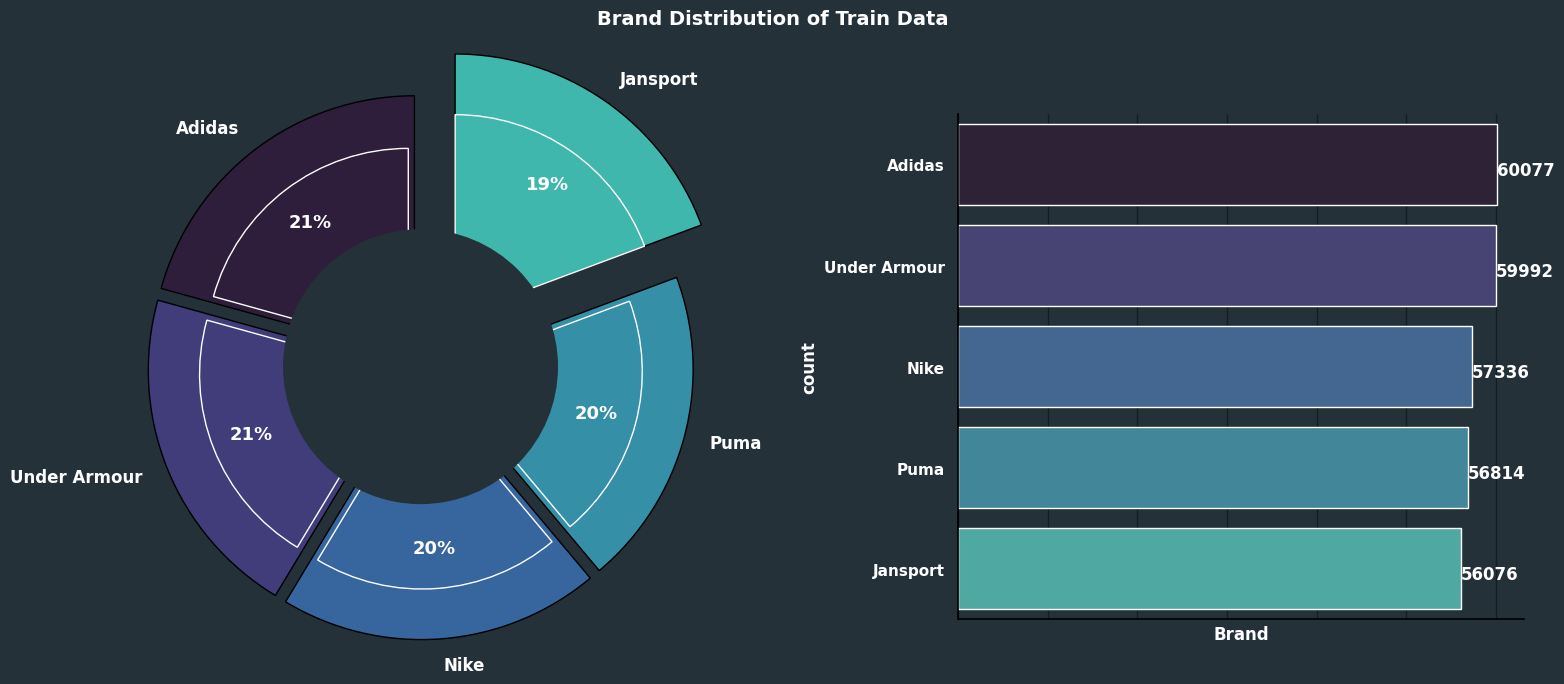

In [15]:
plot_count(train_tg, 'Brand', 'Brand Distribution of Train Data')

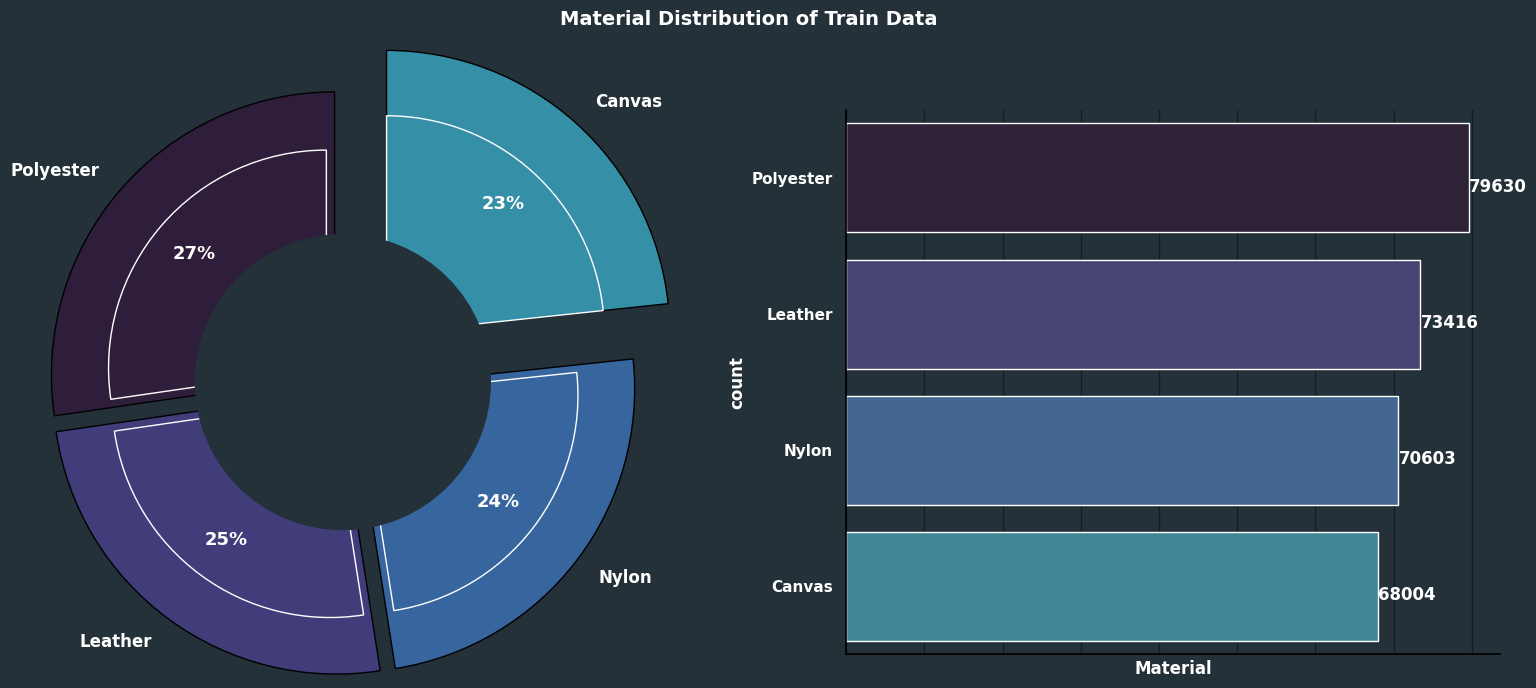

In [16]:
plot_count(train_tg, 'Material', 'Material Distribution of Train Data')

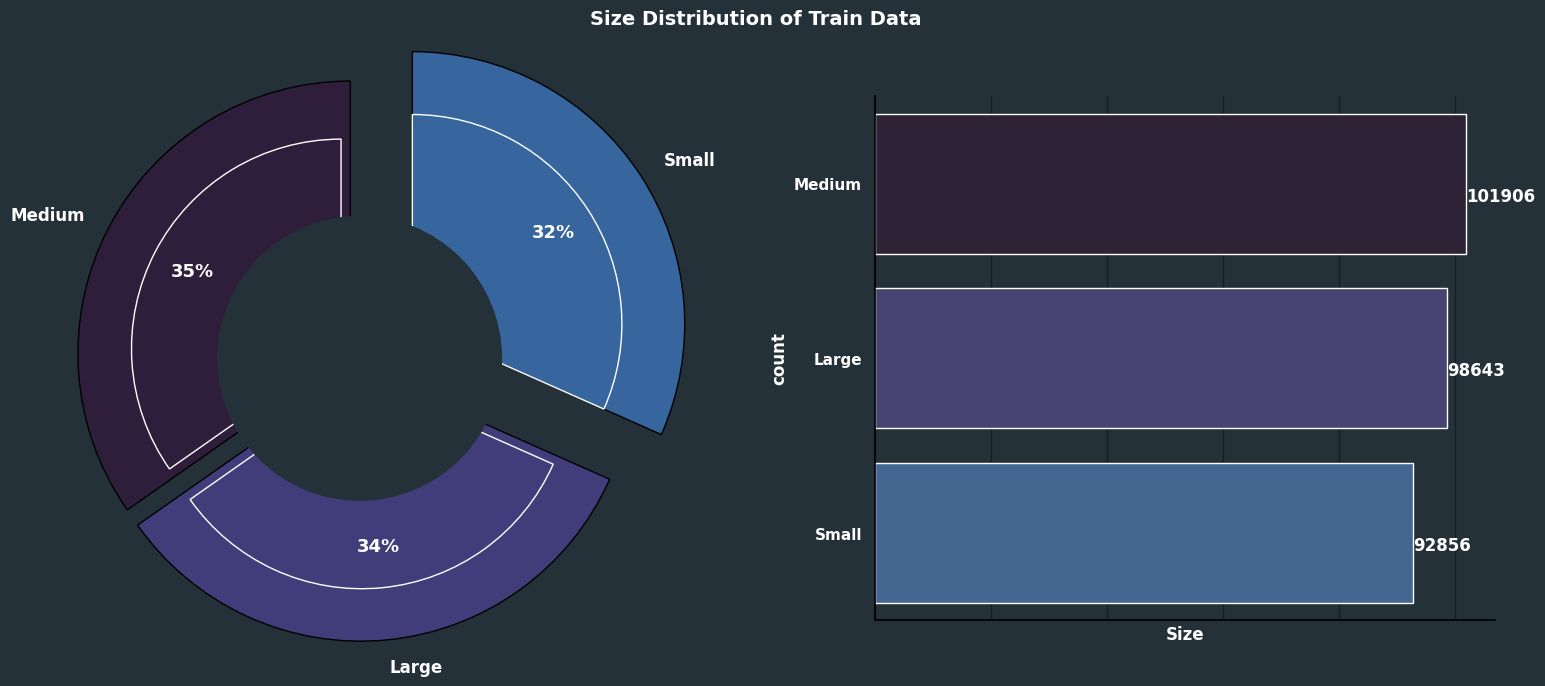

In [17]:
plot_count(train_tg, 'Size', 'Size Distribution of Train Data')

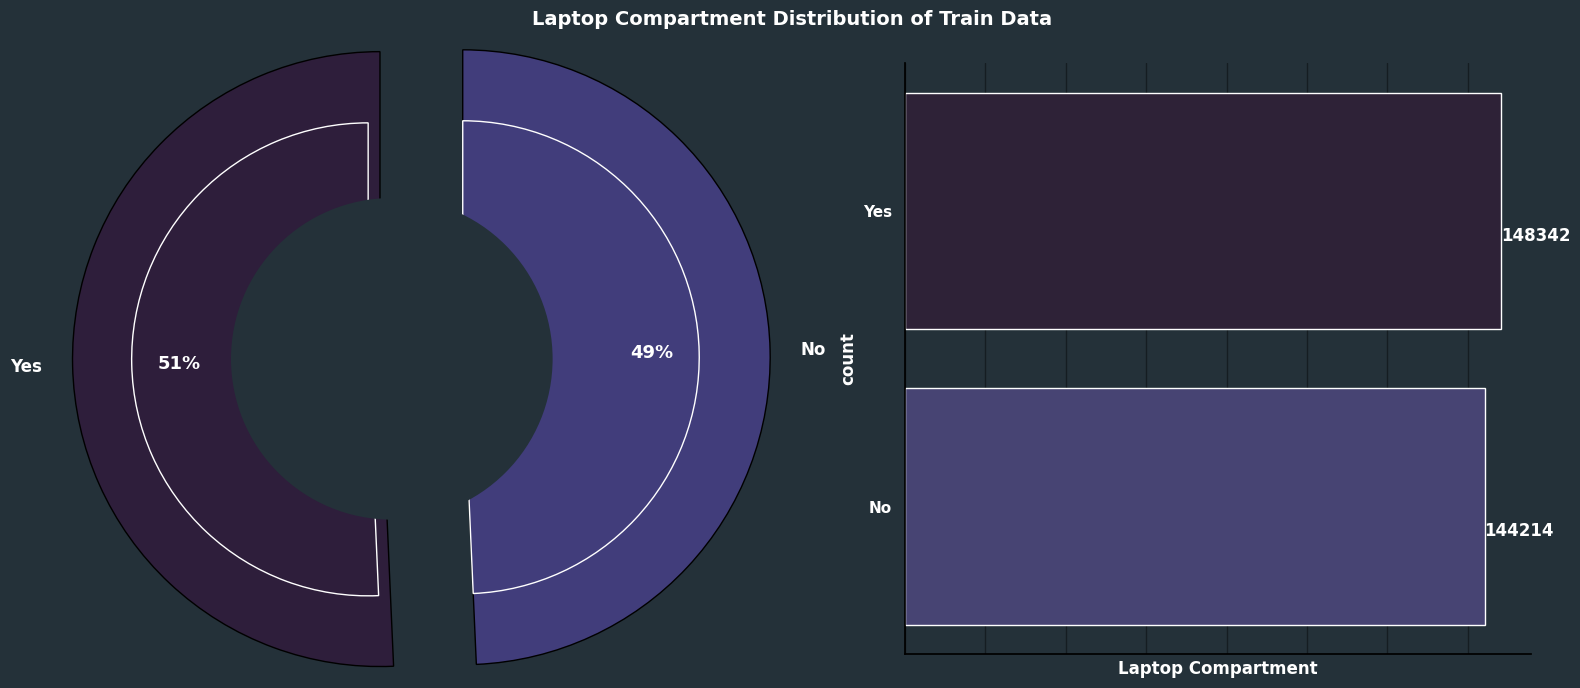

In [18]:
plot_count(train_tg, 'Laptop Compartment', 'Laptop Compartment Distribution of Train Data')

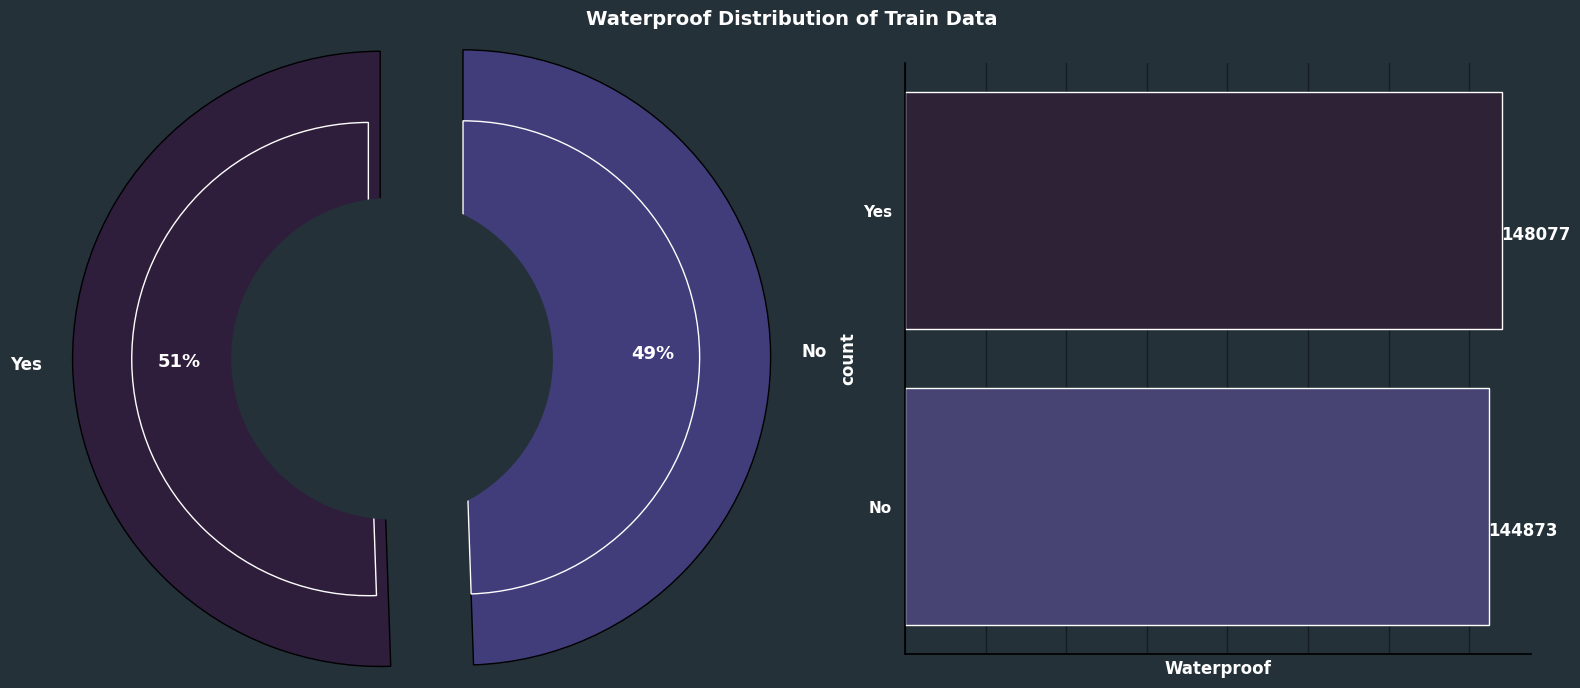

In [19]:
plot_count(train_tg, 'Waterproof', 'Waterproof Distribution of Train Data')

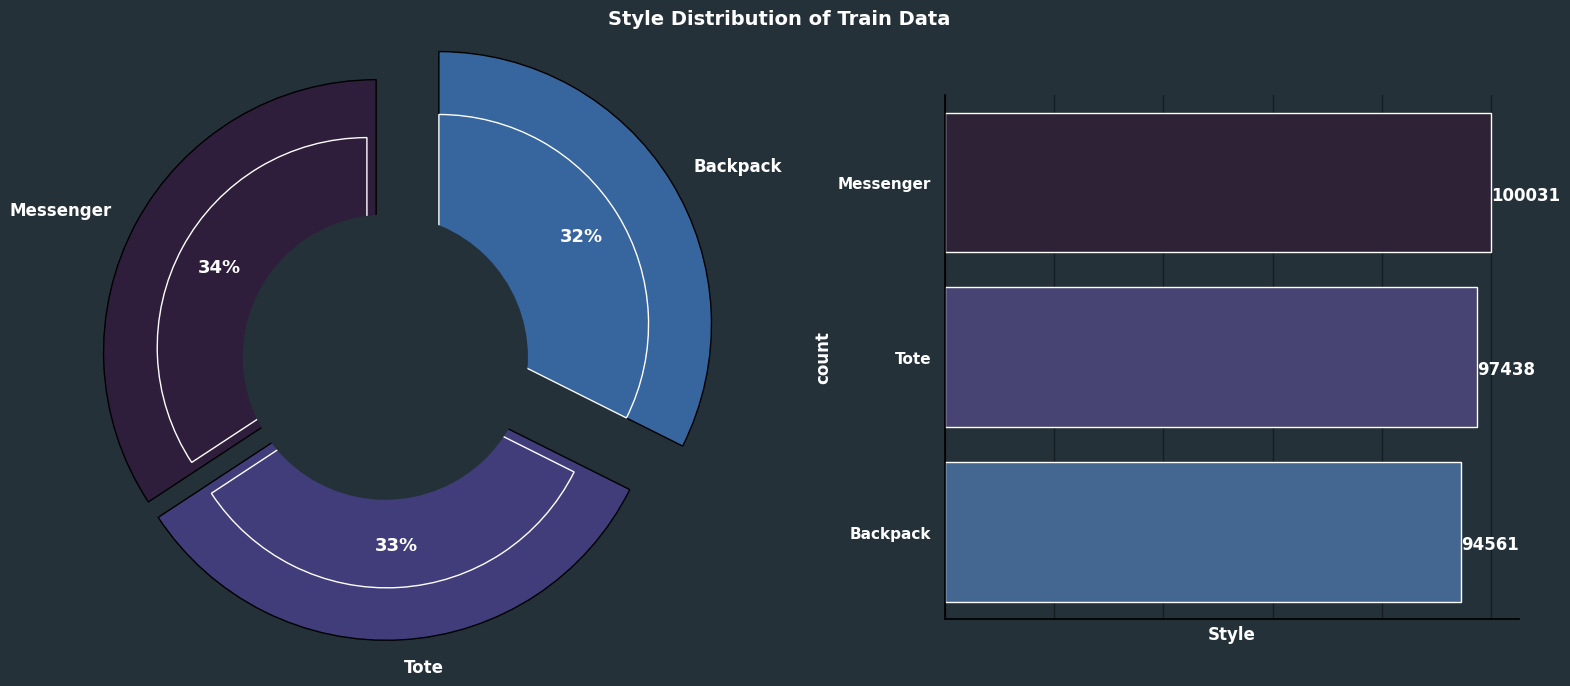

In [20]:
plot_count(train_tg, 'Style', 'Style Distribution of Train Data')

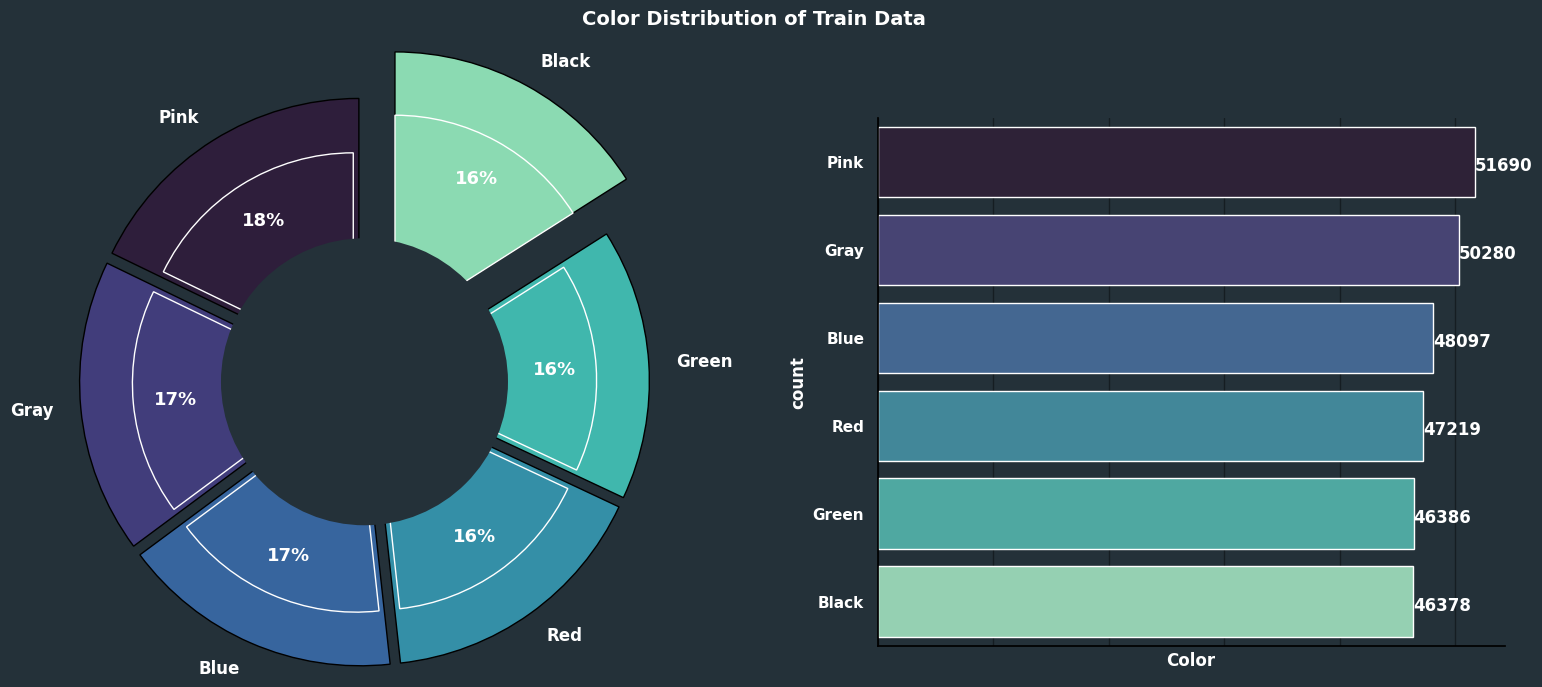

In [21]:
plot_count(train_tg, 'Color', 'Color Distribution of Train Data')

# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜  Data Preprocessing</p>

In [22]:
orig = pd.read_csv("/kaggle/input/student-bag-price-prediction-dataset/Noisy_Student_Bag_Price_Prediction_Dataset.csv")
orig = orig.loc[(orig["Weight Capacity (kg)"]>5)&(orig["Weight Capacity (kg)"]<30)]
orig.columns = [f"orig_{c}" for c in orig.columns]
train = train_df.merge(orig.iloc[:,:], left_on="Weight Capacity (kg)", right_on="orig_Weight Capacity (kg)", how="left")
#train = train_df.drop("id",axis=1)
test = test_df.merge(orig.iloc[:,:], left_on="Weight Capacity (kg)", right_on="orig_Weight Capacity (kg)", how="left")
train.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,orig_Brand,orig_Material,orig_Size,orig_Compartments,orig_Laptop Compartment,orig_Waterproof,orig_Style,orig_Color,orig_Weight Capacity (kg),orig_Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,Puma,Nylon,Small,7.0,No,Yes,Tote,Black,11.611723,39.770555
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Testing
dict_fen = {'Material':'NaN','Style':'NaN','Brand':'NaN','Size':'NaN','Waterproof':'NaN','Color':'NaN','Laptop Compartment':'NaN'}

def feh(df):
    df = df.fillna(dict_fen)

    map_size       = {'Small':1.1,'Medium':1.2,'Large':1.3,'NaN':0}
    map_brand      = {'Jansport':1.1,'Adidas':1.2,'Nike':1.3,'Puma':1.4,'Under Armour':1.5,'NaN':0}
    map_color      = {'Black':1.1,'Green':1.2,'Red':1.3,'Blue':1.4,'Gray':1.05,'Pink':1.5,'NaN':0}
    map_style      = {'Messenger':1.1,'Backpack':1.2,'Tote':1.3,'NaN':0}
    map_material   = {'Polyester':1.1,'Leather':1.2,'Nylon':1.3,'Canvas':1.4,'NaN':0}
    map_waterproof = {'Yes':1.1,'No':1.0,'NaN':0}
    map_laptop     = {'Yes':1.1,'No':1.0,'NaN':0}
    
    df['Size_map']        = df['Size'].map(map_size)
    df['Brand_map']       = df['Brand'].map(map_brand)
    df['Color_map']       = df['Color'].map(map_color)
    df['Style_map']       = df['Style'].map(map_style)
    df['Material_map']    = df['Material'].map(map_material)
    df['Waterproof_map']  = df['Waterproof'].map(map_waterproof)
    df['Laptop_map']      = df['Laptop Compartment'].map(map_laptop)
    df['Compartments_map']= df['Compartments'].apply(lambda x: x/1.1)

    df = df.rename(columns={'Size_map':'x1', 'Brand_map':'x2', 'Color_map':'x3', 
                            'Style_map':'x4', 'Material_map':'x5', 'Waterproof_map':'x6', 
                            'Laptop_map':'x7', 'Compartments_map':'x8'}) 

    polar_df = pl.from_pandas(df)
    polar_df = polar_df.with_columns(
        _2_1=((pl.col('x1')-pl.col('x3'))**2 + (pl.col('x2')-pl.col('x4'))**2).sqrt(),
        _2_2=((pl.col('x1')-pl.col('x5'))**2 + (pl.col('x2')-pl.col('x6'))**2).sqrt(),
        _2_3=((pl.col('x1')-pl.col('x7'))**2 + (pl.col('x2')-pl.col('x8'))**2).sqrt(),
        _3_1=((pl.col('x1')-pl.col('x4'))**2 + (pl.col('x2')-pl.col('x5'))**2 + (pl.col('x3')-pl.col('x6'))**2).sqrt(),
        _3_2=((pl.col('x1')-pl.col('x7'))**2 + (pl.col('x2')-pl.col('x8'))**2).sqrt(),
        _3_3=((pl.col('x4')-pl.col('x7'))**2 + (pl.col('x5')-pl.col('x8'))**2).sqrt(),
        _4_1=((pl.col('x1')-pl.col('x5'))**2 + (pl.col('x2')-pl.col('x6'))**2 + 
              (pl.col('x3')-pl.col('x7'))**2 + (pl.col('x4')-pl.col('x8'))**2).sqrt()
    )

    # Standardize the weight capacity. Alternatively, you could create bins.
    scaler = StandardScaler()
    df["Weight_Capacity_scaled"] = scaler.fit_transform(df[["Weight Capacity (kg)"]])
    df["Weight_Capacity_scaled"] = scaler.transform(df[["Weight Capacity (kg)"]])
    
    df = polar_df.to_pandas()
    return df
    
#train = feh(train_tg)
#test  = feh(test_df)

train = feh(train)
test  = feh(test)

In [24]:
# # Define imputation strategies
# categorical_features = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
# numerical_features = ["Weight Capacity (kg)"]

# # Fill categorical missing values with mode (most frequent value)
# for col in categorical_features:
#     train_tg[col].fillna(train_tg[col].mode()[0], inplace=True)
#     test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# # Fill numerical missing values with median
# for col in numerical_features:
#     train_tg[col].fillna(train_tg[col].median(), inplace=True)
#     test_df[col].fillna(test_df[col].median(), inplace=True)

In [25]:
# Calculate aggregated statistics for each brand in training data
# brand_stats = train_tg.groupby("Brand")["Price"].agg(["mean", "median", "std"]).reset_index()
# brand_stats.columns = ["Brand", "Brand_mean_price", "Brand_median_price", "Brand_std_price"]

brand_stats = train.groupby("Brand")["Price"].agg(["mean", "median", "std"]).reset_index()
brand_stats.columns = ["Brand", "Brand_mean_price", "Brand_median_price", "Brand_std_price"]

# Merge aggregated stats to both train and test datasets
#train_data = train_tg.merge(brand_stats, on="Brand", how="left")
#test_data = test_df.merge(brand_stats, on="Brand", how="left")

train_data = train.merge(brand_stats, on="Brand", how="left")
test_data = test.merge(brand_stats, on="Brand", how="left")


# In test_data, if any brand is missing (new brand), you might fill with global stats:
global_mean = train_data["Price"].mean()
global_median = train_data["Price"].median()
global_std = train_data["Price"].std()
test_data["Brand_mean_price"].fillna(global_mean, inplace=True)
test_data["Brand_median_price"].fillna(global_median, inplace=True)
test_data["Brand_std_price"].fillna(global_std, inplace=True)

# Calculate average price per material and create bins
material_avg = train_data.groupby("Material")["Price"].mean().reset_index().rename(columns={"Price": "Material_avg_price"})
train_data = train_data.merge(material_avg, on="Material", how="left")
test_data = test_data.merge(material_avg, on="Material", how="left")

# Bin the materials based on quantiles of average price
material_bins = pd.qcut(train_data["Material_avg_price"], q=3, labels=["Low", "Medium", "High"])
train_data["Material_price_bin"] = material_bins

# For test set, use the same bin edges as training (here, using pd.cut with bins from quantiles)
bin_edges = pd.qcut(train_data["Material_avg_price"], q=3, retbins=True)[1]
test_data["Material_price_bin"] = pd.cut(test_data["Material_avg_price"], bins=bin_edges, labels=["Low", "Medium", "High"], include_lowest=True)

# Convert Labtop Compartment and Waterproof
binary_map = {"Yes": 1, "No": 0}
train_data["Laptop Compartment"] = train_data["Laptop Compartment"].map(binary_map)
test_data["Laptop Compartment"] = test_data["Laptop Compartment"].map(binary_map)
train_data["Waterproof"] = train_data["Waterproof"].map(binary_map)
test_data["Waterproof"] = test_data["Waterproof"].map(binary_map)

# Standardize the weight capacity. Alternatively, you could create bins.
scaler = StandardScaler()
train_data["Weight_Capacity_scaled"] = scaler.fit_transform(train_data[["Weight Capacity (kg)"]])
test_data["Weight_Capacity_scaled"] = scaler.transform(test_data[["Weight Capacity (kg)"]])

train = train_data.copy()
test = test_data.copy()

In [26]:
# # One-hot Encoding:
# cat_features_to_encode = ["Brand", "Material", "Size", "Style", "Color", "Material_price_bin"]

# # Use pandas get_dummies for simplicity
# train_data_encoded = pd.get_dummies(train_data, columns=cat_features_to_encode, drop_first=True)
# test_data_encoded = pd.get_dummies(test_data, columns=cat_features_to_encode, drop_first=True)

# # Ensure both train and test have the same dummy columns
# train_cols = set(train_data_encoded.columns)
# test_cols = set(test_data_encoded.columns)
# for col in train_cols - test_cols:
#     test_data_encoded[col] = 0
# for col in test_cols - train_cols:
#     train_data_encoded[col] = 0

# # Sort columns to maintain consistent order
# train_data_encoded = train_data_encoded.sort_index(axis=1)
# test_data_encoded = test_data_encoded.sort_index(axis=1)

# # Now, your data is ready for model training.
# print("Feature engineering and encoding complete!")
# print_sl()

In [27]:
# train = train_data_encoded.copy()

# # For testing, ensure the target column is dropped if it exists
# if "Price" in test_data_encoded.columns:
#     test = test_data_encoded.drop("Price", axis=1)
# else:
#     test = test_data_encoded.copy()

# y_train = train['Price']
# X_train = train.drop(['Price'], axis=1)

# print("Train and test sets are ready for model training!")
# print_sl()

# X_train.head()

In [28]:
# One-hot Encoding:
cat_features_to_encode = ['Material', 'Style', 'Brand', 'Size', 'Waterproof', 'Color', 'Laptop Compartment', 
                         'orig_Material', 'orig_Style', 'orig_Brand', 'orig_Size', 'orig_Waterproof', 'orig_Color', 'orig_Laptop Compartment']

# Use pandas get_dummies for simplicity
train = pd.get_dummies(train, columns=cat_features_to_encode, drop_first=True)
test = pd.get_dummies(test, columns=cat_features_to_encode, drop_first=True)

# Ensure both train and test have the same dummy columns
train_cols = set(train.columns)
test_cols = set(train.columns)
for col in train_cols - test_cols:
    train[col] = 0
for col in test_cols - train_cols:
    train[col] = 0

# Sort columns to maintain consistent order
train = train.sort_index(axis=1)
test = test.sort_index(axis=1)

# Now, your data is ready for model training.
print("Feature engineering and encoding complete!")
print_sl()

Feature engineering and encoding complete!



In [29]:
# For testing, ensure the target column is dropped if it exists
if "Price" in test.columns:
    test = test.drop("Price", axis=1)
else:
    test = test.copy()

y_train = train['Price']
X_train = train.drop(['Price'], axis=1)

print("Train and test sets are ready for model training!")
print_sl()

Train and test sets are ready for model training!



In [30]:
for col in X_train.columns:
    if X_train[col].dtype in ['float64', 'int64']:
        X_train[col].fillna(X_train[col].median(), inplace=True)
    else:
        X_train[col].fillna(X_train[col].mode()[0], inplace=True)

for col in test.columns:
    if test[col].dtype in ['float64', 'int64']:
        test[col].fillna(test[col].median(), inplace=True)
    else:
        test[col].fillna(test[col].mode()[0], inplace=True)

X_train.head()

,Brand_Jansport,Brand_NaN,Brand_Nike,Brand_Puma,Brand_Under Armour,Brand_mean_price,Brand_median_price,Brand_std_price,Color_Blue,Color_Gray,Color_Green,Color_NaN,Color_Pink,Color_Red,Compartments,Laptop Compartment_1.0,Material_Leather,Material_NaN,Material_Nylon,Material_Polyester,Material_avg_price,Material_price_bin,Size_Medium,Size_NaN,Size_Small,Style_Messenger,Style_NaN,Style_Tote,Waterproof_1.0,Weight Capacity (kg),Weight_Capacity_scaled,_2_1,_2_2,_2_3,_3_1,_3_2,_3_3,_4_1,orig_Brand_Jansport,orig_Brand_Nike,orig_Brand_Puma,orig_Brand_Under Armour,orig_Color_Blue,orig_Color_Gray,orig_Color_Green,orig_Color_Pink,orig_Color_Red,orig_Compartments,orig_Laptop Compartment_Yes,orig_Material_Leather,orig_Material_Nylon,orig_Material_Polyester,orig_Price,orig_Size_Medium,orig_Size_Small,orig_Style_Messenger,orig_Style_Tote,orig_Waterproof_Yes,orig_Weight Capacity (kg),x1,x2,x3,x4,x5,x6,x7,x8
0,True,False,False,False,False,81.791276,81.47039,38.970598,False,False,False,False,False,False,7.0,True,True,False,False,False,80.437883,Low,True,False,False,False,False,True,False,11.611723,-0.921252,0.223607,0.100000,5.264586,0.173205,5.264586,5.167508,5.064624,False,False,True,False,False,False,False,False,False,7.0,False,False,True,False,39.770555,False,True,False,True,True,11.611723,1.2,1.1,1.1,1.3,1.2,1.0,1.1,6.363636
1,True,False,False,False,False,81.791276,81.47039,38.970598,False,False,True,False,False,False,10.0,True,False,False,False,False,82.106511,High,False,False,True,True,False,False,True,27.078537,1.298790,0.100000,0.300000,7.990909,0.316228,7.990909,7.690909,7.997164,False,False,False,False,False,False,False,False,False,6.0,False,False,False,False,82.779626,False,False,False,False,False,17.948554,1.1,1.1,1.2,1.1,1.4,1.1,1.1,9.090909
2,False,False,False,False,True,81.976311,81.99574,38.955756,False,False,False,False,False,True,2.0,True,True,False,False,False,80.437883,Low,False,False,True,True,False,False,False,16.643760,-0.198974,0.447214,0.509902,0.318182,0.424264,0.318182,0.618182,0.903208,False,False,False,False,False,False,False,False,False,6.0,False,False,False,False,82.779626,False,False,False,False,False,17.948554,1.1,1.5,1.3,1.1,1.2,1.0,1.1,1.818182
3,False,False,True,False,False,81.319209,80.67946,39.129019,False,False,True,False,False,False,8.0,True,False,False,True,False,81.024760,Low,False,False,True,True,False,False,False,12.937220,-0.730995,0.223607,0.360555,5.972727,0.200000,5.972727,5.972727,6.184057,False,False,False,False,False,False,False,False,False,6.0,False,False,False,False,82.779626,False,False,False,False,False,17.948554,1.1,1.3,1.2,1.1,1.3,1.0,1.1,7.272727
4,False,False,False,False,False,80.631060,80.09502,38.805601,False,False,True,False,False,False,1.0,True,False,False,False,False,82.106511,High,True,False,False,True,False,False,True,17.749338,-0.040284,0.100000,0.223607,0.307617,0.244949,0.307617,0.490909,0.310558,False,False,False,False,False,False,False,False,False,6.0,False,False,False,False,82.779626,False,False,False,False,False,17.948554,1.2,1.2,1.2,1.1,1.4,1.1,1.1,0.909091


In [31]:
#plot_correlation_heatmap(train, 'Preprocessed Dataset Correlation')

# <p style="background-color:#E6F7FF; font-family:'Comic Sans MS', cursive; font-weight:bold; color:#1192AA; font-size:100%; text-align:center; border: 1px solid #003366; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 51, 102, 0.2);">📜 Model Training</p>

In [32]:
# NOT RELEVANT FOR NOW

class Regressor:
    def __init__(self, n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.models_name = list(self._define_model().keys())
        self.len_models = len(self.models)
        
    def _define_model(self):
        
        xgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 7,
            'learning_rate': 0.0116,
            'colsample_bytree': 1,
            'subsample': 0.6085,
            'min_child_weight': 9,
            'reg_lambda': 4.879e-07,
            'max_bin': 431,
            'n_jobs': -1,
            'eval_metric': 'mae',
            'objective': "reg:squarederror",
            'verbosity': 0,
            'random_state': self.random_state,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
        xgb_exact_params = xgb_params.copy()
        xgb_exact_params['tree_method'] = 'exact'
        xgb_approx_params = xgb_params.copy()
        xgb_approx_params['tree_method'] = 'approx'
        
        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 7,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.60,
            'colsample_bytree': 1,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-07,
            'objective': 'regression_l1',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'device': self.device,
            'verbosity': -1,
            'random_state': self.random_state
        }
        lgb2_params = {
            'n_estimators': self.n_estimators,
            'num_leaves': 93, 
            'min_child_samples': 20, 
            'learning_rate': 0.05533790147941807, 
            'colsample_bytree': 0.8809128870084636, 
            'reg_alpha': 0.0009765625, 
            'reg_lambda': 0.015589408048174165,
            'objective': 'regression_l1',
            'metric': 'mean_absolute_error',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state
        }
        lgb3_params = {
            'n_estimators': self.n_estimators,
            'num_leaves': 45,
            'max_depth': 13,
            'learning_rate': 0.0684383311038932,
            'subsample': 0.5758412171285148,
            'colsample_bytree': 0.8599714680300794,
            'reg_lambda': 1.597717830931487e-08,
            'objective': 'regression_l1',
            'metric': 'mean_absolute_error',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
            'force_col_wise': True
        }
        lgb_goss_params = lgb_params.copy()
        lgb_goss_params['boosting_type'] = 'goss'
        lgb_dart_params = lgb_params.copy()
        lgb_dart_params['boosting_type'] = 'dart'
        lgb_dart_params['n_estimators'] = 500
                
        cb_params = {
            'iterations': self.n_estimators,
            'depth': 8,
            'learning_rate': 0.01,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
        cb2_params = {
            'iterations': self.n_estimators,
            'depth': 9, 
            'learning_rate': 0.456,
            'l2_leaf_reg': 8.41,
            'random_strength': 0.18,
            'max_bin': 225, 
            'od_wait': 58, 
            'grow_policy': 'Lossguide',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MAE',
            'loss_function': 'MAE',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
        cb3_params = {
            'n_estimators': self.n_estimators,
            'depth': 11,
            'learning_rate': 0.08827842054729117,
            'l2_leaf_reg': 4.8351074756668864e-05,
            'random_strength': 0.21306687539993183,
            'max_bin': 483,
            'od_wait': 97,
            'grow_policy': 'Lossguide',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MAE',
            'loss_function': 'MAE',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
            'silent': True
        }
        cb_sym_params = cb_params.copy()
        cb_sym_params['grow_policy'] = 'SymmetricTree'
        cb_loss_params = cb_params.copy()
        cb_loss_params['grow_policy'] = 'Lossguide'
        
        models = {
            #"xgb": xgb.XGBRegressor(**xgb_params),
            #"xgb_exact": xgb.XGBRegressor(**xgb_exact_params),
            #"xgb_approx": xgb.XGBRegressor(**xgb_approx_params),
            #"lgb": lgb.LGBMRegressor(**lgb_params),
            "lgb_": lgb.LGBMRegressor(verbosity=-1),
            #"lgb2": lgb.LGBMRegressor(**lgb2_params),
            #"lgb3": lgb.LGBMRegressor(**lgb3_params),
            "cat": CatBoostRegressor(**cb_params),
            #"cat2": CatBoostRegressor(**cb2_params),
            #"cat3": CatBoostRegressor(**cb3_params),
            #"cat_sym": CatBoostRegressor(**cb_sym_params),
            #"cat_loss": CatBoostRegressor(**cb_loss_params),
            #"Ridge": RidgeCV(),
            #"Lasso": LassoCV(),
            #"RandomForestRegressor": RandomForestRegressor(n_estimators=200, random_state=self.random_state, n_jobs=-1),
            #"PLSRegression": PLSRegression(n_components=10, max_iter=2000),
            #"PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=3000, tol=1e-3, n_iter_no_change=30, random_state=self.random_state),
            #"GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05, loss="absolute_error", random_state=self.random_state),
            #"HistGradientBoostingRegressor": HistGradientBoostingRegressor(max_iter=self.n_estimators, learning_rate=0.01, loss="absolute_error", n_iter_no_change=300,random_state=self.random_state),
            #"ARDRegression": ARDRegression(n_iter=1000),
            #"HuberRegressor": HuberRegressor(max_iter=3000),
            #"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
        }
        
        return models

```python

# OPTUNA MODELS

train_predictors, eval_predictors, train_target, eval_target = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

def objective(trial):
    # Choose the model type to optimize
    model_type = trial.suggest_categorical("model_type", ["lgb", "cat", "xgb"])
    
    if model_type == "lgb":
        # Prepare LightGBM datasets
        lgb_train = lgb.Dataset(train_predictors, label=train_target)
        lgb_val = lgb.Dataset(eval_predictors, label=eval_target, reference=lgb_train)
        
        params = {
            'objective': 'regression',
            'metric': 'rmse',
            'learning_rate': trial.suggest_float('lgb_learning_rate', 1e-5, 1e-1, log=True),
            'max_depth': trial.suggest_int('lgb_max_depth', 3, 12),
            'num_leaves': trial.suggest_int('lgb_num_leaves', 20, 150),
            'min_data_in_leaf': trial.suggest_int('lgb_min_data_in_leaf', 10, 100),
            'reg_alpha': trial.suggest_float('lgb_reg_alpha', 1e-10, 1e-1, log=True),
            'reg_lambda': trial.suggest_float('lgb_reg_lambda', 1e-10, 1e-1, log=True),
            'verbose': -1,
            'seed': 42
        }
        n_estimators = trial.suggest_int('lgb_n_estimators', 100, 1000)
        
        # Use callback for early stopping
        callbacks = [lgb.early_stopping(stopping_rounds=50, verbose=False)]
        model = lgb.train(
            params,
            lgb_train,
            num_boost_round=n_estimators,
            valid_sets=[lgb_val],
            callbacks=callbacks
        )
        predictions = model.predict(eval_predictors, num_iteration=model.best_iteration)
        
    elif model_type == "cat":
        # CatBoost parameters
        params = {
            'loss_function': 'RMSE',
            'learning_rate': trial.suggest_float('cat_learning_rate', 1e-3, 0.3, log=True),
            'depth': trial.suggest_int('cat_depth', 3, 12),
            'l2_leaf_reg': trial.suggest_float('cat_l2_leaf_reg', 1e-5, 10.0, log=True),
            'random_seed': 42,
            'verbose': False,
            'early_stopping_rounds': 50
        }
        n_estimators = trial.suggest_int('cat_n_estimators', 100, 1000)
        model = cb.CatBoostRegressor(**params, iterations=n_estimators)
        model.fit(train_predictors, train_target, 
                  eval_set=(eval_predictors, eval_target), 
                  use_best_model=True)
        predictions = model.predict(eval_predictors)
        
    elif model_type == "xgb":
        # XGBoost parameters
        params = {
            'objective': 'reg:squarederror',
            'learning_rate': trial.suggest_float('xgb_learning_rate', 1e-3, 0.3, log=True),
            'max_depth': trial.suggest_int('xgb_max_depth', 3, 12),
            'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
            'subsample': trial.suggest_float('xgb_subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.5, 1.0),
            'reg_alpha': trial.suggest_float('xgb_reg_alpha', 1e-10, 1e-1, log=True),
            'reg_lambda': trial.suggest_float('xgb_reg_lambda', 1e-10, 1e-1, log=True),
            'seed': 42
        }
        n_estimators = trial.suggest_int('xgb_n_estimators', 100, 1000)
        model = xgb.XGBRegressor(**params, n_estimators=n_estimators)
        model.fit(train_predictors, train_target, 
                  eval_set=[(eval_predictors, eval_target)],
                  early_stopping_rounds=50,
                  verbose=False)
        predictions = model.predict(eval_predictors)
        
    # Compute RMSE
    rmse = sqrt(mean_squared_error(eval_target, predictions))
    return rmse

study = optuna.create_study(direction='minimize', study_name='Model_Ensemble_Tuning')
optuna.logging.set_verbosity(optuna.logging.DEBUG)
study.optimize(objective, n_trials=500)

best_params = study.best_params
best_score  = study.best_value

print("Best parameters:", best_params)
print("Best RMSE score:", best_score)
```

In [33]:
# drop everything insignificant
cols_to_keep = ["Brand_mean_price", "Brand_median_price", "Brand_std_price", 
                "Laptop Compartment_1.0", "Material_avg_price", 
                "Weight Capacity (kg)", "Weight_Capacity_scaled", 
                "orig_Weight Capacity (kg)", "orig_Price"]

# Keep only the desired columns
X_train = X_train[cols_to_keep]
test = test[cols_to_keep]

In [34]:
cats = ['Brand_Jansport','Brand_NaN', 'Brand_Nike',	'Brand_Puma', 'Brand_Under Armour', 'Color_Blue', 'Color_Gray',
        'Color_Green', 'Color_NaN', 'Color_Pink', 'Color_Red', 'Laptop Compartment_No',	'Laptop Compartment_Yes',
        'Material_Leather',	'Material_NaN', 'Material_Nylon', 'Material_Polyester',	'Size_Medium', 'Size_NaN', 
        'Size_Small', 'Style_Messenger', 'Style_NaN', 'Style_Tote', 'Waterproof_No', 'Waterproof_Yes']
# Configurations
kfold = True
n_splits = 10 if kfold else 1
random_state = 42
n_estimators = 700
early_stopping_rounds = 666
verbose = False

# Assuming X_train, y_train, and test are already defined
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Arrays to store predictions
test_pred_total = np.zeros(test.shape[0])
oof_pred_total = np.zeros(X_train.shape[0])
ensemble_scores = []

fold_idx = 0
start_time = time.time()

print("Starting ensemble training...")

for train_index, val_index in kf.split(X_train):
    fold_start_time = time.time()
    fold_idx += 1
    print(f"\n=== Fold {fold_idx} ===")
    
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Define models
    models = {
        "LGBM": lgb.LGBMRegressor(
            objective='regression',
            metric='rmse',
            random_state=random_state,
            n_estimators=500,
            max_depth=7,
            num_leaves=16,
            learning_rate=0.05,
            subsample=0.60,
            colsample_bytree=1,
            reg_alpha=0.25,
            reg_lambda=5e-07,
            boosting_type='gbdt',
            verbosity = -1,
        ),
        
        "CatBoost_optuna": cb.CatBoostRegressor(
            random_state = random_state,
            learning_rate = 0.2757572018124821,
            depth = 3, 
            l2_leaf_reg = 7.247059958722575, 
            n_estimators = 666,
            #cat_features = cats
        ),
        
        "LGBM_optuna": lgb.LGBMRegressor(
            learning_rate = 0.03125634355299445, 
            max_depth = 4, 
            num_leaves = 69, 
            min_data_in_leaf = 84, 
            reg_alpha = 0.0003940341792750523, 
            reg_lambda = 2.2071774712491142e-08, 
            n_estimators = 1000,
            verbosity = -1,
        ),

        # "XGB_": xgb.XGBRegressor(
        #     max_depth=6,  
        #     colsample_bytree=0.5, 
        #     subsample=0.8,  
        #     n_estimators=10_000,  
        #     learning_rate=0.2,  
        #     enable_categorical=True,
        #     min_child_weight=10,
        #     early_stopping_rounds=100,
        # )
    }

    val_preds_list = []
    test_preds_list = []

    for name, model in models.items():
        print(f"Training {name}...")
        if isinstance(model, lgb.LGBMRegressor):
            model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=verbose)])
        else:
            model.fit(X_tr, y_tr, eval_set=(X_val, y_val), verbose=verbose)

        # Predictions
        val_preds = model.predict(X_val)
        test_preds = model.predict(test)

        val_preds_list.append(val_preds)
        test_preds_list.append(test_preds)

    # -----------------
    # Simple Ensemble: Average Predictions
    # -----------------
    val_preds_ensemble = np.mean(val_preds_list, axis=0)
    test_preds_ensemble = np.mean(test_preds_list, axis=0)

    # Store predictions
    oof_pred_total[val_index] = val_preds_ensemble
    test_pred_total += test_preds_ensemble / n_splits

    # Calculate RMSE for current fold
    fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds_ensemble))
    ensemble_scores.append(fold_rmse)
    print(f"Fold {fold_idx} RMSE: {fold_rmse:.5f} (Fold time: {time.time()-fold_start_time:.1f} sec)")

    gc.collect()

total_time = time.time() - start_time
print(f"\nTraining complete. Total time: {total_time/60:.2f} minutes.")
print(f"Average RMSE: {np.mean(ensemble_scores):.5f}")

# test_pred_total holds the ensemble test predictions


Starting ensemble training...

=== Fold 1 ===
Training LGBM...
Training CatBoost_optuna...
Training LGBM_optuna...
Fold 1 RMSE: 38.85982 (Fold time: 15.9 sec)

=== Fold 2 ===
Training LGBM...
Training CatBoost_optuna...
Training LGBM_optuna...
Fold 2 RMSE: 38.87304 (Fold time: 18.8 sec)

=== Fold 3 ===
Training LGBM...
Training CatBoost_optuna...
Training LGBM_optuna...
Fold 3 RMSE: 38.99645 (Fold time: 18.2 sec)

=== Fold 4 ===
Training LGBM...
Training CatBoost_optuna...
Training LGBM_optuna...
Fold 4 RMSE: 39.00832 (Fold time: 13.5 sec)

=== Fold 5 ===
Training LGBM...
Training CatBoost_optuna...
Training LGBM_optuna...
Fold 5 RMSE: 38.94436 (Fold time: 21.2 sec)

=== Fold 6 ===
Training LGBM...
Training CatBoost_optuna...
Training LGBM_optuna...
Fold 6 RMSE: 39.01705 (Fold time: 14.6 sec)

=== Fold 7 ===
Training LGBM...
Training CatBoost_optuna...
Training LGBM_optuna...
Fold 7 RMSE: 39.00683 (Fold time: 16.4 sec)

=== Fold 8 ===
Training LGBM...
Training CatBoost_optuna...
Traini

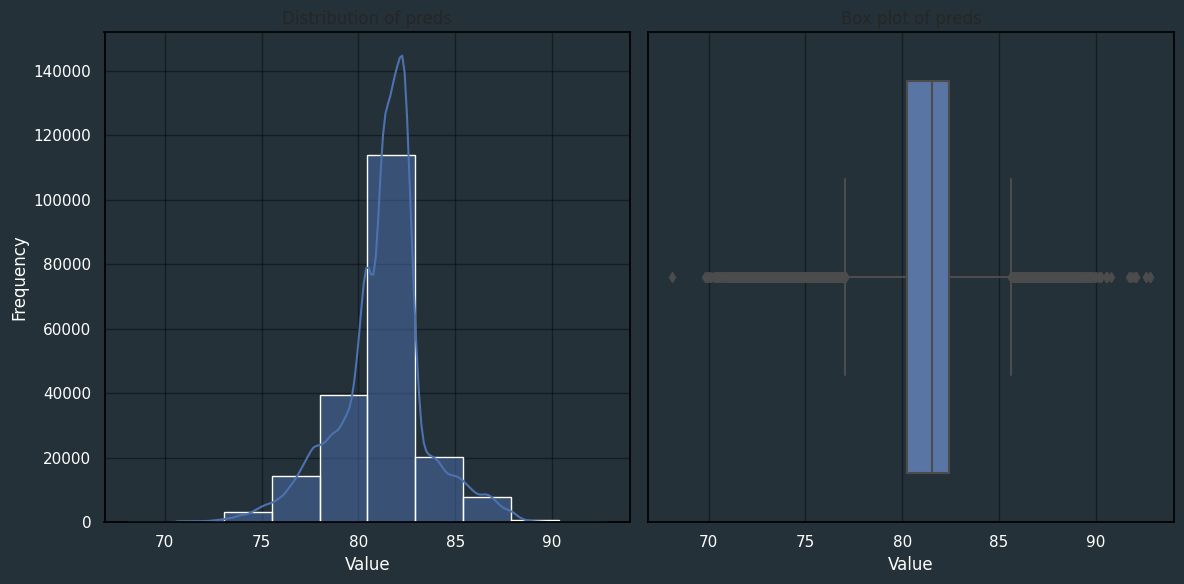

In [35]:
# Adjust the figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot
sns.histplot(test_pred_total, bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of preds')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=test_pred_total, ax=axes[1])
axes[1].set_title('Box plot of preds')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [36]:
sub = pd.read_csv(sub_PATH)
#sub[f'{target}'] = test_pred_total

# public solutions
SAE_TE_XGB = pd.read_csv("/kaggle/input/s5e2-sae-te-xgb/submission.csv")
ps_A_XGB = pd.read_csv("/kaggle/input/ps-s5e2-hyperspace-as-feats-a-xgboost-lightgbm/submission.csv")

ps_A_XGB.columns = ps_A_XGB.columns.str.strip()
SAE_TE_XGB.columns = SAE_TE_XGB.columns.str.strip()


sub['Price'] = ps_A_XGB['Price'] * 0 + SAE_TE_XGB['Price'] * 0.5 + test_pred_total * 0.5

sub.to_csv('submission.csv', index=False)
sub

,id,Price
0,300000,80.887139
1,300001,81.103422
2,300002,86.392679
3,300003,80.038804
4,300004,79.396885
...,...,...
199995,499995,80.344516
199996,499996,78.153688
199997,499997,82.851336
199998,499998,82.063329
